# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

In [2]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [3]:
len(reviews)

25000

In [4]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [5]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [6]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [7]:
from collections import Counter
import numpy as np

In [8]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [9]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [10]:
positive_counts.most_common()[:10]

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235)]

In [11]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [12]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()[:20]

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796)]

In [13]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:20]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488)]

# Transforming Text into Numbers

In [14]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

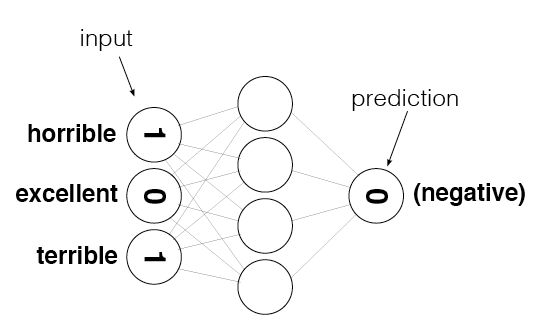

In [15]:
Image(filename='sentiment_network.png')

In [17]:
review = "The movie was excellent"

#Image(filename='sentiment_network_pos.png')

In [20]:
import numpy as np

# creating the vocabulary (set of all word tokens)
V = set(total_counts.keys())

# creating the placeholder word-vector in the length of the vocabulary
layer_0 = np.zeros((len(V),))
layer_0

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [22]:
# next we need to assign a place in the vector to each word in the vocabulary
# this needs to be a consistent mapping, so we better mold it into a variable
word2index = dict()
for i, word in enumerate(V):
    word2index[word] = i # could also be the other way around
word2index

{'': 0,
 'trust': 1,
 'rapping': 2,
 'unsuited': 3,
 'sbardellati': 66979,
 'devolved': 4,
 'chainsaw': 5,
 'bologna': 6,
 'tarzans': 49308,
 'unfeeling': 11,
 'fullest': 12,
 'exp': 13,
 'nietzsche': 15,
 'diviner': 17,
 'salvatore': 18,
 'froid': 20,
 'seduced': 21,
 'mansfield': 22,
 'celie': 23,
 'erasing': 25,
 'captivates': 26,
 'cliffhanging': 27,
 'smolders': 73410,
 'mannheim': 29,
 'vilsmaier': 32,
 'antenna': 31,
 'wringing': 37052,
 'aji': 33,
 'dittrich': 71437,
 'uruk': 35,
 'kato': 8,
 'hells': 37,
 'weeping': 39,
 'vampira': 55147,
 'colorize': 44,
 'botcher': 42,
 'waned': 43,
 'ghoultown': 61698,
 'materially': 52485,
 'ewaste': 47,
 'tasting': 48,
 'harlem': 49,
 'loooooooooooong': 50,
 'mowbrays': 51,
 'seductions': 52,
 'softest': 53,
 'followed': 54,
 'iiunhappy': 55,
 'headbanger': 57,
 'tudor': 58,
 'giraud': 59,
 'sammo': 72551,
 'ddt': 14,
 'horst': 63,
 'badger': 61,
 'haverford': 65,
 'panicking': 49314,
 'agaaaain': 16342,
 'misspent': 66,
 'lillian': 67,
 

In [23]:
layer_0[0][]

0.0

In [26]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent \
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    
    for word in review.split(" "):
        layer_0[word2index[word]] += 1 # what is this layer_0[0] doing here in his solution?!

    
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    if label == "POSITIVE":
        return 1
    elif label == "NEGATIVE":
        return 0
    else:
        print("Something went wrong here...")

In [28]:
update_input_layer(reviews[0])
layer_0

array([ 18.,   0.,   0., ...,   0.,   0.,   0.])

In [30]:
get_target_for_label(labels[0])

1

In [31]:
get_target_for_label(labels[1])

0